In [1]:
import pandas as pd
import scanpy as sc
import numpy as np

### Test functions

In [2]:
%load_ext autoreload
%autoreload 2
from openproblems.tasks.chromatin_potential import datasets
adata = datasets.scicar_mouse_kidney()

/Users/qq06/anaconda3/envs/openproblem/lib/python3.8/site-packages/anndata-0.7.4-py3.8.egg/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'source' as categorical
... storing 'replicate' as categorical
... storing 'experiment' as categorical
... storing 'cell_name' as categorical
... storing 'gene_type' as categorical
... storing 'gene_short_name' as categorical


In [3]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

/Users/qq06/anaconda3/envs/openproblem/lib/python3.8/site-packages/anndata-0.7.4-py3.8.egg/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [4]:
adata.shape

(9233, 22671)

In [5]:
adata.var.head()

,gene_type,gene_short_name,n_cells
gene_id,,,
ENSMUSG00000051951.5,protein_coding,Xkr4,103
ENSMUSG00000089699.1,antisense,Gm1992,9
ENSMUSG00000102343.1,lincRNA,Gm37381,56
ENSMUSG00000025900.12,protein_coding,Rp1,236
ENSMUSG00000102948.1,processed_pseudogene,Gm6101,9


In [6]:
adata.var['mt'] = adata.var.gene_short_name.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [7]:
adata.obs.pct_counts_mt.describe()

count    9233.000000
mean        5.199697
std         5.835944
min         0.000000
25%         1.975309
50%         3.162853
75%         5.708661
max        51.144642
Name: pct_counts_mt, dtype: float64

/Users/qq06/anaconda3/envs/openproblem/lib/python3.8/site-packages/seaborn-0.11.0-py3.8.egg/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/qq06/anaconda3/envs/openproblem/lib/python3.8/site-packages/seaborn-0.11.0-py3.8.egg/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/qq06/anaconda3/envs/openproblem/lib/python3.8/site-packages/seaborn-0.11.0-py3.8.egg/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/qq06/anaconda3/envs/openproblem/lib/python3.8/site-packages/seaborn-0.11.0-py3.8.egg/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/qq06/anaconda3/envs/openp

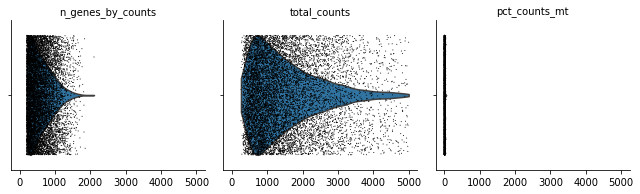

In [8]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [9]:
adata.obs.head()

,source,replicate,experiment,tsne_1,tsne_2,cell_name,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
sample,,,,,,,,,,,
coRNA-RNA-plate1-001.ACGCTTCTCT,Mouse,Replicate 2,coassay,-3.513582,-34.385932,Loop of Henle cells,741,741,1607.0,74.0,4.604854
coRNA-RNA-plate1-001.ACGTTGAATG,Mouse,Replicate 1,coassay,-3.651114,26.483438,Proximal tubule S1/S2 cells,962,962,2011.0,61.0,3.033317
coRNA-RNA-plate1-001.AGGACTGCGA,Mouse,Replicate 1,coassay,-15.516718,26.730361,Proximal tubule S1/S2 cells,511,511,794.0,11.0,1.385390
coRNA-RNA-plate1-001.AGGCCGGTAA,Mouse,Replicate 1,coassay,-8.852847,28.122226,Proximal tubule S1/S2 cells,1207,1206,2427.0,39.0,1.606922
coRNA-RNA-plate1-001.CATGACTCAA,Mouse,Replicate 1,coassay,2.808426,-45.948924,Loop of Henle cells,414,414,679.0,13.0,1.914580


In [10]:
adata = adata[adata.obs.n_genes_by_counts < 2000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]

/Users/qq06/anaconda3/envs/openproblem/lib/python3.8/site-packages/anndata-0.7.4-py3.8.egg/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/qq06/anaconda3/envs/openproblem/lib/python3.8/site-packages/anndata-0.7.4-py3.8.egg/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [11]:
adata.shape

(8124, 22671)

In [12]:
adata.var.loc[adata.var.index.map(lambda x: x.split('.')[1]).astype('int')==23, :]

,gene_type,gene_short_name,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
gene_id,,,,,,,,
ENSMUSG00000038729.23,protein_coding,Akap2,694,False,694,0.100184,92.483483,925.0


In [13]:
!pyensembl install --release 100 --species mus_musculus

2020-11-08 21:45:43,006 - pyensembl.shell - INFO - Running 'install' for EnsemblRelease(release=100, species='mus_musculus')
2020-11-08 21:45:43,407 - pyensembl.sequence_data - INFO - Loaded sequence dictionary from /Users/qq06/Library/Caches/pyensembl/GRCm38/ensembl100/Mus_musculus.GRCm38.cdna.all.fa.gz.pickle
2020-11-08 21:45:43,460 - pyensembl.sequence_data - INFO - Loaded sequence dictionary from /Users/qq06/Library/Caches/pyensembl/GRCm38/ensembl100/Mus_musculus.GRCm38.ncrna.fa.gz.pickle
2020-11-08 21:45:43,550 - pyensembl.sequence_data - INFO - Loaded sequence dictionary from /Users/qq06/Library/Caches/pyensembl/GRCm38/ensembl100/Mus_musculus.GRCm38.pep.all.fa.gz.pickle


In [14]:
from pyensembl import EnsemblRelease
data = EnsemblRelease(100, species='mus_musculus')

In [15]:
exon_ids  = data.gene_by_id('ENSMUSG00000038729')

In [16]:
exon_ids

Gene(gene_id='ENSMUSG00000038729', gene_name='Pakap', biotype='protein_coding', contig='4', start=57717657, end=57896984, strand='+', genome='GRCm38')

In [17]:
adata.var.index.map(lambda x:x.split('.')[0])

Index(['ENSMUSG00000051951', 'ENSMUSG00000089699', 'ENSMUSG00000102343',
       'ENSMUSG00000025900', 'ENSMUSG00000102948', 'ENSMUSG00000025902',
       'ENSMUSG00000104328', 'ENSMUSG00000098104', 'ENSMUSG00000102175',
       'ENSMUSG00000033845',
       ...
       'ENSMUSG00000064342', 'ENSMUSG00000064343', 'ENSMUSG00000064344',
       'ENSMUSG00000064345', 'ENSMUSG00000064351', 'ENSMUSG00000064363',
       'ENSMUSG00000064367', 'ENSMUSG00000064368', 'ENSMUSG00000064370',
       'ENSMUSG00000064371'],
      dtype='object', name='gene_id', length=22671)

In [18]:
genes = []
for i in adata.var.index.map(lambda x:x.split('.')[0]):
    try:
        gene = data.gene_by_id(i) 
        genes.append([gene.gene_id, gene.gene_name, 'chr%s' % gene.contig, gene.start, gene.end, gene.strand])
    except:
        genes.append([np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])

In [19]:
pd.DataFrame(genes).shape, adata.var.shape

((22671, 6), (22671, 8))

In [20]:
adata.var = pd.concat([adata.var, pd.DataFrame(genes, index=adata.var_names)], axis=1)

In [21]:
pd.DataFrame(adata.uns['mode2_var']).shape, adata.var.shape, adata.obsm['mode2'].shape

((252741, 3), (22671, 14), (8124, 252741))

In [22]:
adata.var.head()

,gene_type,gene_short_name,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,0,1,2,3,4,5
gene_id,,,,,,,,,,,,,,
ENSMUSG00000051951.5,protein_coding,Xkr4,103,False,103,0.013322,98.884436,123.0,ENSMUSG00000051951,Xkr4,chr1,3205901.0,3671498.0,-
ENSMUSG00000089699.1,antisense,Gm1992,9,False,9,0.000975,99.902524,9.0,ENSMUSG00000089699,Gm1992,chr1,3466587.0,3513553.0,+
ENSMUSG00000102343.1,lincRNA,Gm37381,56,False,56,0.008015,99.393480,74.0,ENSMUSG00000102343,Gm37381,chr1,3905739.0,3986215.0,-
ENSMUSG00000025900.12,protein_coding,Rp1,236,False,236,0.048955,97.443951,452.0,ENSMUSG00000025900,Rp1,chr1,3999557.0,4409241.0,-
ENSMUSG00000102948.1,processed_pseudogene,Gm6101,9,False,9,0.001083,99.902524,10.0,ENSMUSG00000102948,Gm6101,chr1,4256234.0,4260519.0,-


In [23]:
pd.isnull(adata.var.iloc[:, 3]).sum()

0

In [24]:
(adata.var.iloc[:, 4].isin(adata.uns['mode2_var'][:, 0])).sum()

0

In [25]:
adata.var.head()

,gene_type,gene_short_name,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,0,1,2,3,4,5
gene_id,,,,,,,,,,,,,,
ENSMUSG00000051951.5,protein_coding,Xkr4,103,False,103,0.013322,98.884436,123.0,ENSMUSG00000051951,Xkr4,chr1,3205901.0,3671498.0,-
ENSMUSG00000089699.1,antisense,Gm1992,9,False,9,0.000975,99.902524,9.0,ENSMUSG00000089699,Gm1992,chr1,3466587.0,3513553.0,+
ENSMUSG00000102343.1,lincRNA,Gm37381,56,False,56,0.008015,99.393480,74.0,ENSMUSG00000102343,Gm37381,chr1,3905739.0,3986215.0,-
ENSMUSG00000025900.12,protein_coding,Rp1,236,False,236,0.048955,97.443951,452.0,ENSMUSG00000025900,Rp1,chr1,3999557.0,4409241.0,-
ENSMUSG00000102948.1,processed_pseudogene,Gm6101,9,False,9,0.001083,99.902524,10.0,ENSMUSG00000102948,Gm6101,chr1,4256234.0,4260519.0,-


In [26]:
adata.obs.head()

,source,replicate,experiment,tsne_1,tsne_2,cell_name,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
sample,,,,,,,,,,,
coRNA-RNA-plate1-001.ACGCTTCTCT,Mouse,Replicate 2,coassay,-3.513582,-34.385932,Loop of Henle cells,741,741,1607.0,74.0,4.604854
coRNA-RNA-plate1-001.ACGTTGAATG,Mouse,Replicate 1,coassay,-3.651114,26.483438,Proximal tubule S1/S2 cells,962,962,2011.0,61.0,3.033317
coRNA-RNA-plate1-001.AGGACTGCGA,Mouse,Replicate 1,coassay,-15.516718,26.730361,Proximal tubule S1/S2 cells,511,511,794.0,11.0,1.385390
coRNA-RNA-plate1-001.AGGCCGGTAA,Mouse,Replicate 1,coassay,-8.852847,28.122226,Proximal tubule S1/S2 cells,1207,1206,2427.0,39.0,1.606922
coRNA-RNA-plate1-001.CATGACTCAA,Mouse,Replicate 1,coassay,2.808426,-45.948924,Loop of Henle cells,414,414,679.0,13.0,1.914580


In [27]:
adata.obsm['X_tsne'] = adata.obs.loc[:, ['tsne_1', 'tsne_2']].values

/Users/qq06/anaconda3/envs/openproblem/lib/python3.8/site-packages/anndata-0.7.4-py3.8.egg/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 0 as categorical
... storing 1 as categorical
... storing 2 as categorical
... storing 5 as categorical


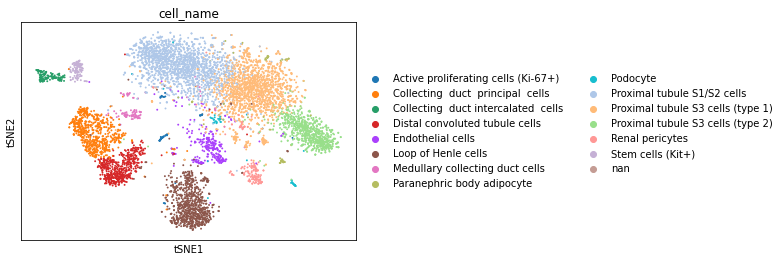

In [28]:
sc.pl.tsne(adata, color='cell_name')

In [29]:
adata.var.head()

,gene_type,gene_short_name,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,0,1,2,3,4,5
gene_id,,,,,,,,,,,,,,
ENSMUSG00000051951.5,protein_coding,Xkr4,103,False,103,0.013322,98.884436,123.0,ENSMUSG00000051951,Xkr4,chr1,3205901.0,3671498.0,-
ENSMUSG00000089699.1,antisense,Gm1992,9,False,9,0.000975,99.902524,9.0,ENSMUSG00000089699,Gm1992,chr1,3466587.0,3513553.0,+
ENSMUSG00000102343.1,lincRNA,Gm37381,56,False,56,0.008015,99.393480,74.0,ENSMUSG00000102343,Gm37381,chr1,3905739.0,3986215.0,-
ENSMUSG00000025900.12,protein_coding,Rp1,236,False,236,0.048955,97.443951,452.0,ENSMUSG00000025900,Rp1,chr1,3999557.0,4409241.0,-
ENSMUSG00000102948.1,processed_pseudogene,Gm6101,9,False,9,0.001083,99.902524,10.0,ENSMUSG00000102948,Gm6101,chr1,4256234.0,4260519.0,-


In [30]:
adata.var.iloc[:, 9]

gene_id
ENSMUSG00000051951.5        Xkr4
ENSMUSG00000089699.1      Gm1992
ENSMUSG00000102343.1     Gm37381
ENSMUSG00000025900.12        Rp1
ENSMUSG00000102948.1      Gm6101
                          ...   
ENSMUSG00000064363.1      mt-Nd4
ENSMUSG00000064367.1      mt-Nd5
ENSMUSG00000064368.1      mt-Nd6
ENSMUSG00000064370.1     mt-Cytb
ENSMUSG00000064371.1       mt-Tt
Name: 1, Length: 22671, dtype: category
Categories (22427, object): ['0610005C13Rik', '0610006L08Rik', '0610009B22Rik', '0610009E02Rik', ..., 'n-R5-8s1', 'n-R5s87', 'n-R5s213', 'nan']

In [31]:
adata_sub = adata[:, (adata.var.iloc[:, 10].isin(np.unique(adata.uns['mode2_var'][:, 0]))) & (~pd.isnull(adata.var.iloc[:, 3]))]
adata_sub.var.index = adata_sub.var.iloc[:, 8]

/Users/qq06/anaconda3/envs/openproblem/lib/python3.8/site-packages/anndata-0.7.4-py3.8.egg/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [32]:
adata_sub.var.head()

,gene_type,gene_short_name,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,0,1,2,3,4,5
0,,,,,,,,,,,,,,
ENSMUSG00000051951,protein_coding,Xkr4,103,False,103,0.013322,98.884436,123.0,ENSMUSG00000051951,Xkr4,chr1,3205901.0,3671498.0,-
ENSMUSG00000089699,antisense,Gm1992,9,False,9,0.000975,99.902524,9.0,ENSMUSG00000089699,Gm1992,chr1,3466587.0,3513553.0,+
ENSMUSG00000102343,lincRNA,Gm37381,56,False,56,0.008015,99.393480,74.0,ENSMUSG00000102343,Gm37381,chr1,3905739.0,3986215.0,-
ENSMUSG00000025900,protein_coding,Rp1,236,False,236,0.048955,97.443951,452.0,ENSMUSG00000025900,Rp1,chr1,3999557.0,4409241.0,-
ENSMUSG00000102948,processed_pseudogene,Gm6101,9,False,9,0.001083,99.902524,10.0,ENSMUSG00000102948,Gm6101,chr1,4256234.0,4260519.0,-


In [33]:
pd.isnull(adata_sub.var.iloc[:, 3]).sum()

0

In [34]:
adata_sub.shape, adata_sub.obsm['mode2'].shape

((8124, 22419), (8124, 252741))

In [35]:
sel = np.isin(adata_sub.uns['mode2_var'][:, 0], adata_sub.var.iloc[:, 10].unique())
adata_sub.uns['mode2_var'] = adata_sub.uns['mode2_var'][sel]
adata_sub.obsm['mode2'] = adata_sub.obsm['mode2'][:, sel]

Trying to set attribute `.uns` of view, copying.
/Users/qq06/anaconda3/envs/openproblem/lib/python3.8/site-packages/anndata-0.7.4-py3.8.egg/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [36]:
def chrom_limit(x):
    y = x.values
    if y[-1] == '+':
        return [y[-3]-1e5, y[-3]+1e5]
    else:
        return [y[-2]-1e5, y[-2]+1e5]
    
extend_tss = adata_sub.var.iloc[:, -3:].apply(chrom_limit, axis=1)
extend_tss = pd.concat([adata_sub.var.iloc[:, 10], 
                        extend_tss.map(lambda x: x[0]),
                        extend_tss.map(lambda x: x[1]), 
                        pd.Series(np.arange(adata_sub.shape[1]), 
                                  index=adata_sub.var_names)], axis=1)                        
#                         adata_sub.var.iloc[:, 2]], axis=1)

In [37]:
extend_tss.head()

,2,0,1,2
0,,,,
ENSMUSG00000051951,chr1,3571498.0,3771498.0,0
ENSMUSG00000089699,chr1,3366587.0,3566587.0,1
ENSMUSG00000102343,chr1,3886215.0,4086215.0,2
ENSMUSG00000025900,chr1,4309241.0,4509241.0,3
ENSMUSG00000102948,chr1,4160519.0,4360519.0,4


In [38]:
peaks = pd.DataFrame(adata_sub.uns['mode2_var'])
summits = pd.concat([peaks.iloc[:, 0], 
                     peaks.iloc[:, [1, 2]].mean(axis=1), 
                     peaks.iloc[:, [1, 2]].mean(axis=1)+1,
                     pd.Series(np.arange(peaks.shape[0]))], axis=1)

In [39]:
summits.head()

,0,0,1,2
0,chr1,3043050.0,3043051.0,0
1,chr1,3050873.5,3050874.5,1
2,chr1,3059202.0,3059203.0,2
3,chr1,3073153.0,3073154.0,3
4,chr1,3101916.0,3101917.0,4


In [40]:
import pybedtools

In [41]:
summits.shape, extend_tss.shape

((251727, 4), (22419, 4))

In [42]:
summits.iloc[:, 1] = summits.iloc[:, 1].astype('int32')
summits.iloc[:, 2] = summits.iloc[:, 2].astype('int32')

extend_tss.iloc[:, 1] = extend_tss.iloc[:, 1].astype('int32')
extend_tss.iloc[:, 2] = extend_tss.iloc[:, 2].astype('int32')

In [43]:
summits.head()

,0,0,1,2
0,chr1,3043050,3043051,0
1,chr1,3050873,3050874,1
2,chr1,3059202,3059203,2
3,chr1,3073153,3073154,3
4,chr1,3101916,3101917,4


In [44]:
extend_tss.head()

,2,0,1,2
0,,,,
ENSMUSG00000051951,chr1,3571498,3771498,0
ENSMUSG00000089699,chr1,3366587,3566587,1
ENSMUSG00000102343,chr1,3886215,4086215,2
ENSMUSG00000025900,chr1,4309241,4509241,3
ENSMUSG00000102948,chr1,4160519,4360519,4


In [45]:
x = pybedtools.BedTool.from_dataframe(summits)

In [46]:
y = pybedtools.BedTool.from_dataframe(extend_tss)

In [47]:
tss_to_peaks = x.intersect(y, wb=True, wa=True, loj=True).to_dataframe()

/Users/qq06/anaconda3/envs/openproblem/lib/python3.8/subprocess.py:849: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


In [48]:
tss_to_peaks.shape

(794267, 8)

In [49]:
tss_to_peaks = tss_to_peaks.loc[(tss_to_peaks.thickEnd != '.') | (tss_to_peaks.score!='.'), :]

In [50]:
tss_to_peaks.shape

(737231, 8)

In [51]:
tss_to_peaks.head()

,chrom,start,end,name,score,strand,thickStart,thickEnd
16,chr1,3368649,3368650,16,chr1,3366587,3566587,1
17,chr1,3377888,3377889,17,chr1,3366587,3566587,1
18,chr1,3385950,3385951,18,chr1,3366587,3566587,1
19,chr1,3386349,3386350,19,chr1,3366587,3566587,1
20,chr1,3400293,3400294,20,chr1,3366587,3566587,1


In [52]:
tss_to_peaks.apply(lambda x:x[6], axis=1)

16         3566587
17         3566587
18         3566587
19         3566587
20         3566587
            ...   
794262    90884738
794263    90884738
794264    90884738
794265    90884738
794266    90884738
Length: 737231, dtype: int64

In [53]:
tss_to_peaks['distance'] = tss_to_peaks.apply(lambda x: abs((int(x[5])+int(x[6]))/2-int(x[1]))*1.0/1e5, axis=1)
tss_to_peaks['weight'] = np.exp(-0.5-4*tss_to_peaks['distance'].values)

In [54]:
tss_to_peaks.head()

,chrom,start,end,name,score,strand,thickStart,thickEnd,distance,weight
16,chr1,3368649,3368650,16,chr1,3366587,3566587,1,0.97938,0.012064
17,chr1,3377888,3377889,17,chr1,3366587,3566587,1,0.88699,0.017458
18,chr1,3385950,3385951,18,chr1,3366587,3566587,1,0.80637,0.024102
19,chr1,3386349,3386350,19,chr1,3366587,3566587,1,0.80238,0.024489
20,chr1,3400293,3400294,20,chr1,3366587,3566587,1,0.66294,0.042777


In [55]:
# adata_sub.var_names.isin(tss_to_peaks.thickEnd).sum(), adata_sub.shape

In [56]:
summits.iloc[:, -1].isin(tss_to_peaks.name.unique()).sum(), summits.shape, adata_sub.uns['mode2_var'].shape[0]

(194691, (251727, 4), 251727)

In [57]:
from scipy.sparse import dok_matrix, csr_matrix
from scipy.stats import spearmanr, pearsonr
# weight = dok_matrix((adata_sub.shape[1], adata_sub.uns['mode2_var'].shape[0]), dtype=np.float32)

In [58]:
tss_to_peaks.name.unique()

array([    16,     17,     18, ..., 251724, 251725, 251726])

In [59]:
m = csr_matrix((tss_to_peaks.weight.values, (tss_to_peaks.thickEnd.astype('int32').values, 
                                                 tss_to_peaks.name.values)), 
               shape=(adata_sub.shape[1], adata_sub.uns['mode2_var'].shape[0]))

In [60]:
m.shape, adata_sub.obsm['mode2'].T.shape, adata_sub.uns['mode2_var'].shape

((22419, 251727), (251727, 8124), (251727, 3))

In [61]:
adata_sub.obsm['gene_score'] = csr_matrix.dot(m, adata_sub.obsm['mode2'].T >= 1).T

In [62]:
adata_sub.obsm['gene_score'].shape, adata_sub.X.shape

((8124, 22419), (8124, 22419))

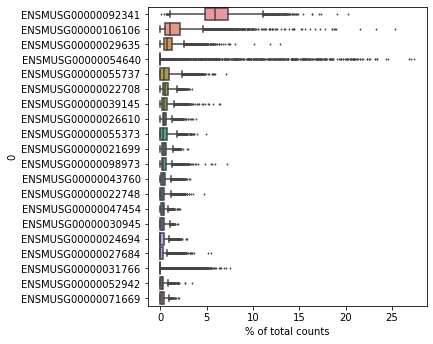

In [63]:
sc.pl.highest_expr_genes(adata_sub, n_top=20)

In [64]:
import scanpy as sc
sc.pp.normalize_total(adata_sub, target_sum=1e4)

In [65]:
sc.pp.log1p(adata_sub)

In [66]:
sc.pp.highly_variable_genes(adata_sub, min_mean=0.0125, max_mean=3, min_disp=0.5, n_top_genes=500)

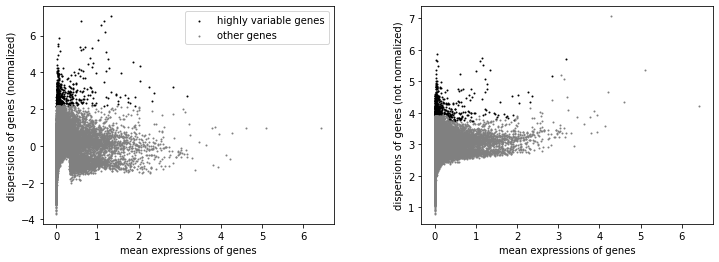

In [67]:
sc.pl.highly_variable_genes(adata_sub)

In [68]:
adata_filter = adata_sub[:, adata_sub.var.highly_variable]

/Users/qq06/anaconda3/envs/openproblem/lib/python3.8/site-packages/anndata-0.7.4-py3.8.egg/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [69]:
adata_filter.shape

(8124, 499)

In [70]:
sc.pp.regress_out(adata_filter, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata_filter, max_value=10)

In [71]:
%%time
cors = []
for i in range(adata_sub.shape[0]):
    cors.append(pearsonr(adata_sub.obsm['gene_score'][i].toarray()[0], adata_sub.X[i].toarray()[0]))

CPU times: user 35min 49s, sys: 38.2 s, total: 36min 27s
Wall time: 4min 48s


In [72]:
pd.DataFrame(cors).iloc[:, 0].median()

0.007439389173241695

<AxesSubplot:xlabel='0', ylabel='Density'>

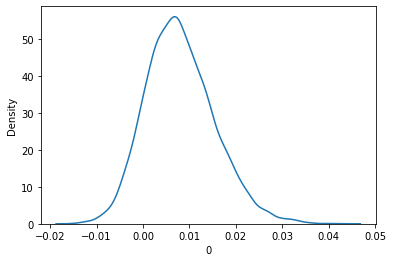

In [74]:
import seaborn as sns
sns.kdeplot(pd.DataFrame(cors).iloc[:, 0])

### Integrative testing

In [2]:
%load_ext autoreload
%autoreload 2

In [9]:
from openproblems.tasks.chromatin_potential import datasets
adata = datasets.scicar_mouse_kidney(test=False)
adata.shape

(11296, 29013)

In [10]:
adata.shape

(11296, 29013)

In [11]:
adata.obs.head()

,source,replicate,experiment,tsne_1,tsne_2,cell_name
coRNA-RNA-plate1-001.ACGCTTCTCT,Mouse,Replicate 2,coassay,-3.513582,-34.385932,Loop of Henle cells
coRNA-RNA-plate1-001.ACGTTGAATG,Mouse,Replicate 1,coassay,-3.651114,26.483438,Proximal tubule S1/S2 cells
coRNA-RNA-plate1-001.AGGACTGCGA,Mouse,Replicate 1,coassay,-15.516718,26.730361,Proximal tubule S1/S2 cells
coRNA-RNA-plate1-001.AGGCCGGTAA,Mouse,Replicate 1,coassay,-8.852847,28.122226,Proximal tubule S1/S2 cells
coRNA-RNA-plate1-001.CATGACTCAA,Mouse,Replicate 1,coassay,2.808426,-45.948924,Loop of Henle cells


In [12]:
%load_ext autoreload
%autoreload 2
from openproblems.tasks.chromatin_potential import methods
adata = methods.beta(adata, n_top_genes=200)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000097109']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000100371']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000097131']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000097285']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000096941']
No results found for query:

            SELECT distinct gene_id
       

No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000097364']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000084894']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000097206']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000097138']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000097598']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG000001

No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000096976']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000097258']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000097524']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000023577']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000105383']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG000001

No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000102798']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000104389']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000104056']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000097542']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000079489']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG000000

No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000097095']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000093514']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000097625']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000097567']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG00000097791']
No results found for query:

            SELECT distinct gene_id
            FROM gene
            WHERE gene_name = ?
        
with parameters: ['ENSMUSG000000

... storing 'chr' as categorical
... storing 'strand' as categorical
/Users/qq06/anaconda3/envs/openproblem/lib/python3.8/subprocess.py:849: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


In [13]:
%autoreload 2

from openproblems.tasks.chromatin_potential import metrics
cors = metrics.spearman_correlation(adata)

/Users/qq06/anaconda3/envs/openproblem/lib/python3.8/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [14]:
cors

0.047240244012637676